### Keras Regression Code Along Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../data/kc_house_data.csv') # file directories

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


mari kita lihat ada apa saja disini. 
kalau kita ingin melihat semuanya kita panggil saja menggunakan tanpa head() function

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


kalo tidak salah ini adalah data buatan dari perian data jadi kita bisa menggunakan ini. untuk belajar. coba nanti ktia buat menggunakan orange dengan data yang sama. 

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### Note:
jadi kurang lebih datanya atau kolomnya seperti ini.

okay sekarang kita akan meakukan EDA

### Exploratory Data Analysis

In [5]:
# mencari null ada atau tidak
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

ini digunakan untuk mengecheck apakah suatu data ada yang null atau tidak. jadi kita bisa menggunakan dua functions sekaligus. isnull() dan sum(). jadi kita langsung menjulahkan perintah yang pertama. begitu jadinya

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


data diatas tidak terlalu mudah untuk dianalisis, jadi kita lebih baik mentranpose nya. menjadi lebih enak dianalaisis.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


nah menjadi menarik sekali. semua datanya dapat kita lihat. dengan mnudah. usahakan rows kita lebih banyak dari kolumn, karena itu akan mempermudah sekali, prinsipnya seperti itu.

In [8]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Note:
nah kita tidak merubah sedikitpun df kita, karena kita tidak memanggilnya. dengan suatu function

selanjutnya kita akan mengguakan atau mengeplot data tersebut. jadi bentuknya seperti ini

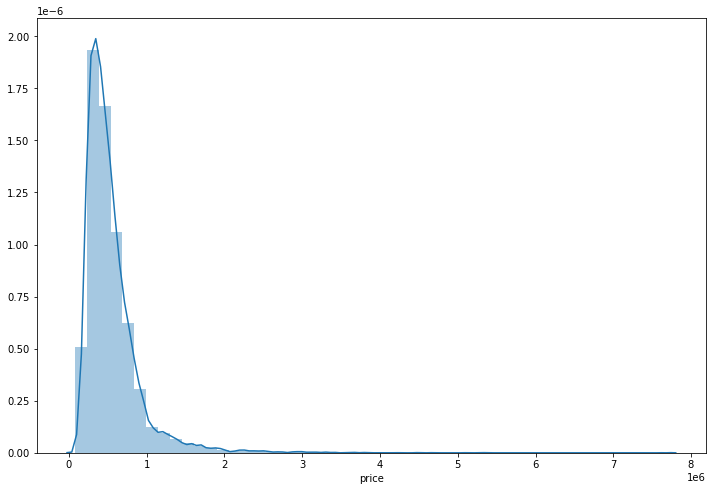

In [9]:
# kita gunakan matplotlib disini. untuk mengeplot
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

nah disini yang kita gunakan sebagai sumbu x nya adalah price, kita ingin melihat bagaimana price diplot, distribusinya bagaimana

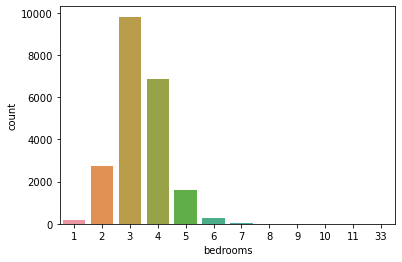

In [10]:
sns.countplot(df['bedrooms'])

disini kita ingin mengetahui bedrooms nya seperti apa. jumlahnya, ternyata yang memliki jumlah 3 terbanyak. 
menarik bukan. 

jangan lupa kita menggunakan countplot()

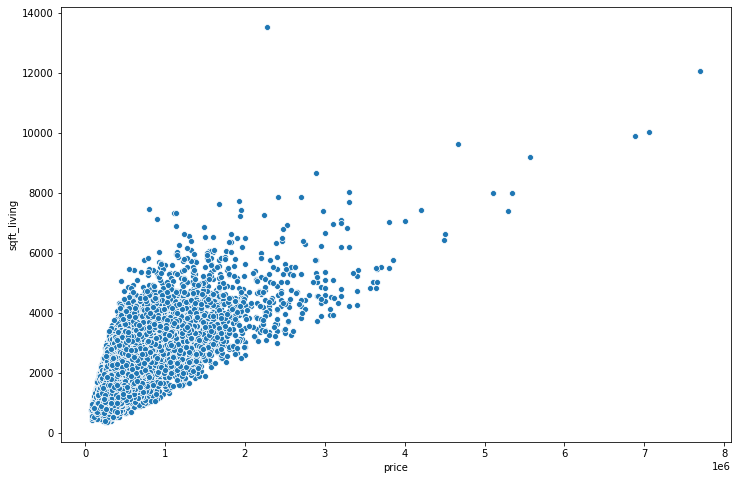

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

nah disini kita mengetahui bahwa ada hubungan seperti ini. sqft adalah The square footage of interior housing living space for the nearest 15 neighbors. atau seperti ini. 

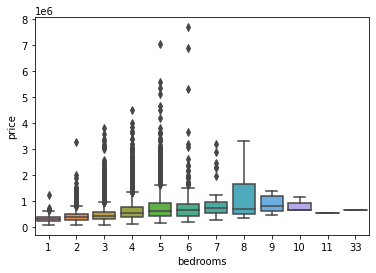

In [12]:
sns.boxplot(x='bedrooms',y='price',data=df)

ktia sudah tahu bahwa boxplot itu dapat mengindikasikan rata rata atau persebaran dari data tersebut. ataukah seperti apa dan bagaimana. mempunyai atau berada pada quartil atau median. ini memerlukan pengetahuan mengenai statistic yang baik. jadi kita harus belajar mengguakan hal ini. 

### Note:

jika melihat data tersebut, harga rumah apabilan dibandingkan dengan jumlah bedrooms atau kamar tidur. naik. semakin tinggi jumlah kamar, maka harganya juga kaan naik. tapi harga yang tidak wajar atau cenderung bervariasi dapat dibuktikan pada rumah diatas 8 ruang

nah sekarang ktia akan melakukan hubungan atau bagaimana data tersbut di explorasi. apa yang kita lakukan. karena datanya adalah rumah. pasti kita mempunyai data geographic entah lokasi, tinggi rendah atau suhu atau cuaca jika datasetnya lengkap

## Geographical Properties

### Longitude Vs Price

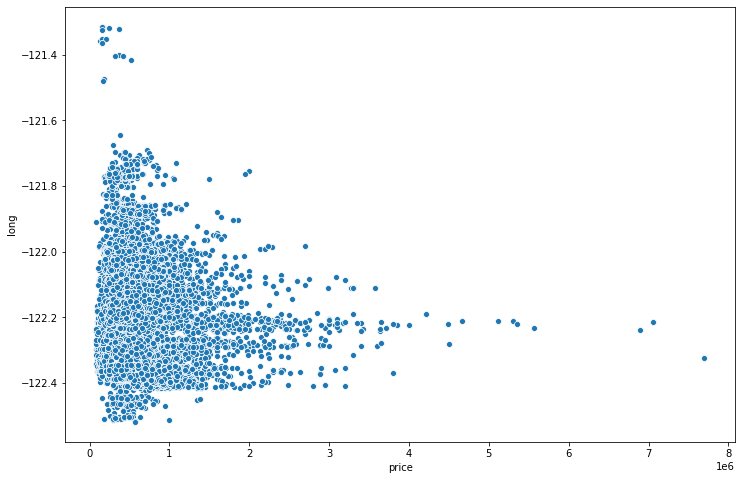

In [13]:
# plot lagi mengguakan geographical properties
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

bunyi code seperti ini, kita akan menscatterplot dengan absis price dan ordinat adalah long atau panjang dari rumah tersbut. mungkin wkwkwk 

coba kita lihat data apa penjabaran utnuk long itu seperti apa. 

disini dia cuma bilang kalau longitude itu hanya longitude tidak ada penjabaran. sebenarnya apa itu longitude? latitude? 

longitude = geopraphical cordinat. jadi dia berada pada garis berapa. 

#### conclusion:
jadi apakah semua ini berpengaruh? semakin longitude nya besar semakin harganya mahal? atau seperti apa? seharusnya banyak sekali feature yang harus kita pelajari. karean setiap daerah mempunyai karakteristiknya sendiri sendiri

### Latitude vs Price

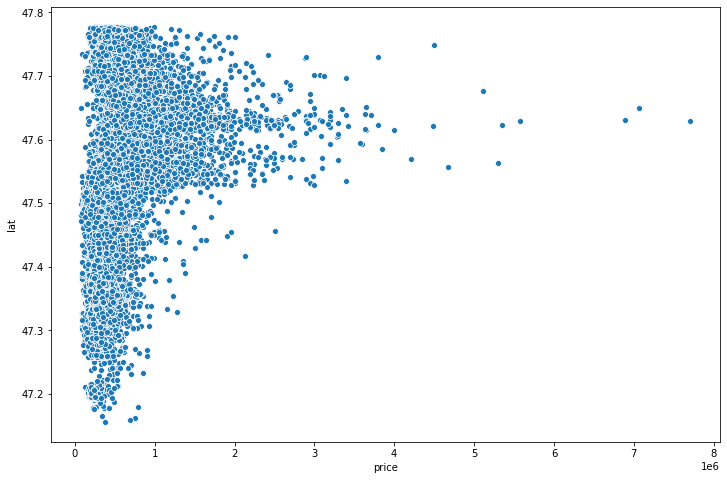

In [14]:
# plot this latitude vs price, jangan lupa absis selalu yang pertama
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

nah datanya seperti diatas. bagaimana kita mengguakan data ini? bagaimana mengeplot 2 dimensi? 

menarik sekali ketika kita menggunakan hal tersebut. 
jadi semakin menarik, kita punya data longitude dan latitude, tidak hanya 2D tapi 3 dimensi, menarik sekali, apa yang kita dapatkan.


mulailah menulis. lose in, if you make somthing bigger and bigger, makes something 



coba kita plot data longitude dan lattitude dan kita menggunakan price, semakin hitam maka datanya. kita lihat dia disebar dimana saja

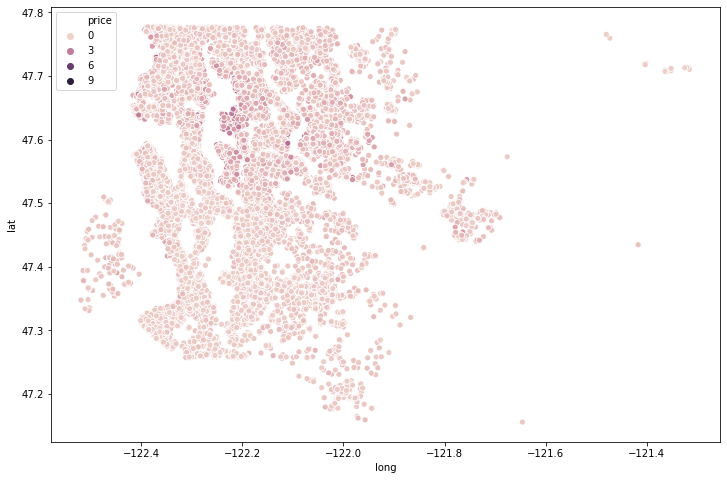

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [16]:
df.sort_values('price',ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


selanjutnya kita akan mensorting dari yang terbesar ke yang terkecil. btw ini masih EDA belum masuk ke membuat model. 

In [17]:
len(df)*(0.01)

215.97

len diguakan utnuk apa?

In [18]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

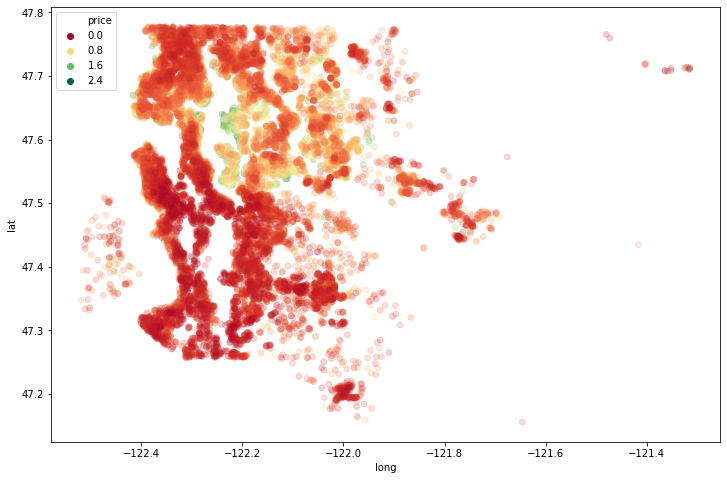

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

wah gambarnya menjadi semakin menarik. tapi ini apa artinya? 
mengapa mengguakan non 1 percent? kita temukan jawabannya di udemy 

len digunakan untuk mencari nilai terbesar. nah idenya dalah sebagai berikut. kita akan mencari nilai dari 1 persent dibawah dari dataset. karena yang paling mahal tidak masuk dalam cluster pembelian atau dari object. karean itu terlalu besar. 

#### note: 
penting untuk mengetahui segement pasar dan menghilangkan data pencilan

## Feature yang lain

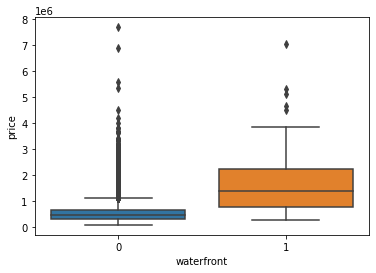

In [20]:
# buat sns bloxplot, 
# ini penting untuk mengetahui bagaimana data bercerita
sns.boxplot(x='waterfront',y='price',data=df)

nah sekali lagi, objective ktia adalah bagaimana mencari hubungan dari harga terkait semua fasilitas yang ada disana. menarik bukan? 

## Working with Feature Data

In [21]:
df.head() # masih sama yang sebelumnnya

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [23]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


karena sudah kita jalankan maka tidak bisa dilakukan dua kali

In [24]:
df.head() # melihat 5 data teratas dari dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date
ini yang paling penting. kita harus mengetahui mengapa kita melakukan feature engineering. apakah data kita sudah dilakukan seperti itu dengan baik atau tidak. 

feature engineering dapat berupa?


### Note: 

In [25]:
df['date'] = pd.to_datetime(df['date'])

In [26]:
df['month'] = df['date'].apply(lambda date:date.month)

In [27]:
df['year'] = df['date'].apply(lambda date:date.year)

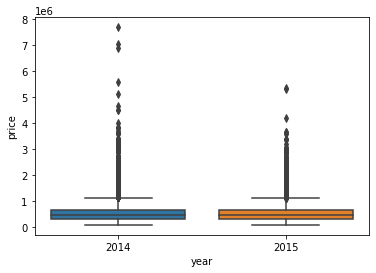

In [28]:
sns.boxplot(x='year',y='price',data=df)

### 1. Graph Year vs Price

dari data diatas kita dapat mengetahui bahwa harga pada tahun 2014 lebih tinggi dari tahun 2015 berarti terdapat penurunan harag, jika kita lihat boxplotnya kita bisa katakan bahwa data tersebut normal. 

bagaimana membaca boxplot yang baik?


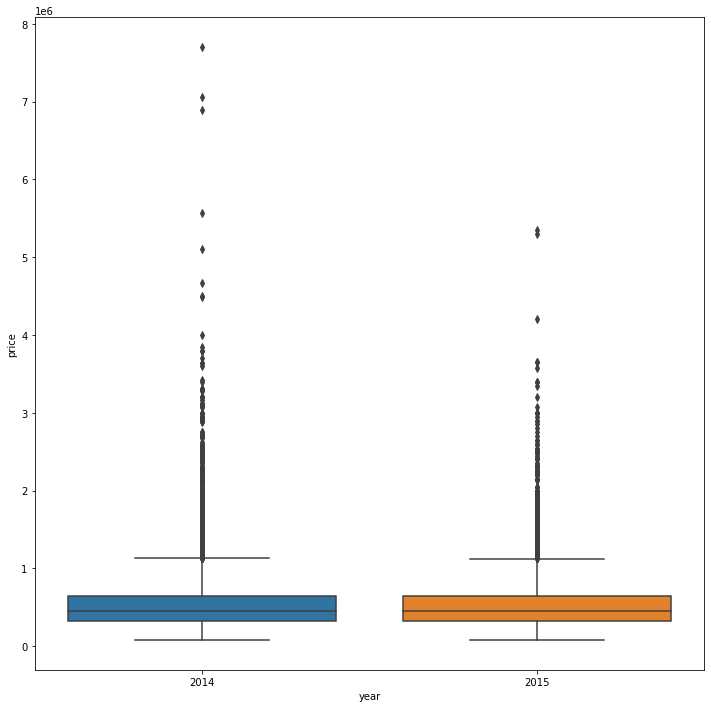

In [29]:
plt.figure(figsize=(12,12))
sns.boxplot(x='year',y='price',data=df)

sama saja. gambarnya tidak terlalu bagus, yang terpenting adalah boxplot nya terbaca dengan baik atau tidak. jadi sama saja. kita tidak mendapatkan hal yang lebih dari sini

### 2. Graph Month vs Price

sekarang kita melihat harga dari perkembangan setiap bulannya pada tahun berapa? kita tidak diberi tahu disini. 

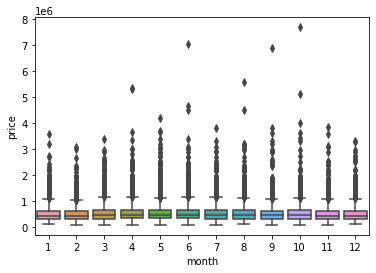

In [30]:
sns.boxplot(x='month',y='price',data=df)

graphic tersebut adalah graphic harga rumah berdasarkan month, jadi terdapat data-data pencilan. kita mengetahui bahwa data tersebut menarik. mengapa pada sekitar bulan ke-4 dan ke-10. 

### Note: buat trend data penjualan pada bulan ke bulan, tidak pada tahun

jadi yang diatas adalah data dari tahun 2014-2015. kita satukan saja. agar lebih mendapatkan insight. 
mengapa harus digabung? 

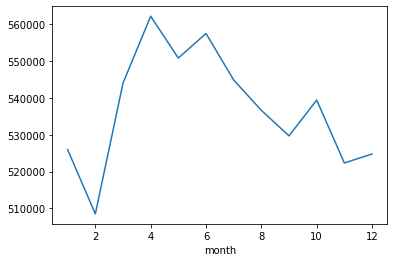

In [31]:
df.groupby('month').mean()['price'].plot() 
#plot this month mean vs price, like simple is this

disini menarik kita mengingat kembali bagaimana grouby digunakan dalam sebuah data. 


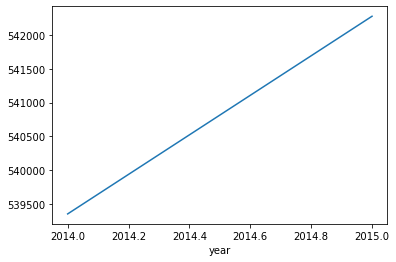

In [32]:
df.groupby('year').mean()['price'].plot()

graph diatas terlihat bahwa harganya meningkat along the year, garnya cenderung naik tiap tahunnya. 

In [33]:
# drop the axis of date, mengapa harus seperti itu? 
df = df.drop('date',axis=1)

In [34]:
df.columns # melihat columnsnya ada berapa saja

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [35]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [36]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,21587,21588,21589,21590,21591,21592,21593,21594,21595,21596
id,7.129301e+09,6.414100e+09,5.631500e+09,2.487201e+09,1.954401e+09,7.237550e+09,1.321400e+09,2.008000e+09,2.414600e+09,3.793500e+09,...,7.852140e+09,9.834201e+09,3.448900e+09,7.936000e+09,2.997800e+09,2.630000e+08,6.600060e+09,1.523300e+09,2.913101e+08,1.523300e+09
price,2.219000e+05,5.380000e+05,1.800000e+05,6.040000e+05,5.100000e+05,1.230000e+06,2.575000e+05,2.918500e+05,2.295000e+05,3.230000e+05,...,5.072500e+05,4.290000e+05,6.106850e+05,1.010000e+06,4.750000e+05,3.600000e+05,4.000000e+05,4.021010e+05,4.000000e+05,3.250000e+05
bedrooms,3.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00
bathrooms,1.000000e+00,2.250000e+00,1.000000e+00,3.000000e+00,2.000000e+00,4.500000e+00,2.250000e+00,1.500000e+00,1.000000e+00,2.500000e+00,...,2.500000e+00,2.000000e+00,2.500000e+00,3.500000e+00,2.500000e+00,2.500000e+00,2.500000e+00,7.500000e-01,2.500000e+00,7.500000e-01
sqft_living,1.180000e+03,2.570000e+03,7.700000e+02,1.960000e+03,1.680000e+03,5.420000e+03,1.715000e+03,1.060000e+03,1.780000e+03,1.890000e+03,...,2.270000e+03,1.490000e+03,2.520000e+03,3.510000e+03,1.310000e+03,1.530000e+03,2.310000e+03,1.020000e+03,1.600000e+03,1.020000e+03
sqft_lot,5.650000e+03,7.242000e+03,1.000000e+04,5.000000e+03,8.080000e+03,1.019300e+05,6.819000e+03,9.711000e+03,7.470000e+03,6.560000e+03,...,5.536000e+03,1.126000e+03,6.023000e+03,7.200000e+03,1.294000e+03,1.131000e+03,5.813000e+03,1.350000e+03,2.388000e+03,1.076000e+03
floors,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,...,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
waterfront,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
view,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
condition,3.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


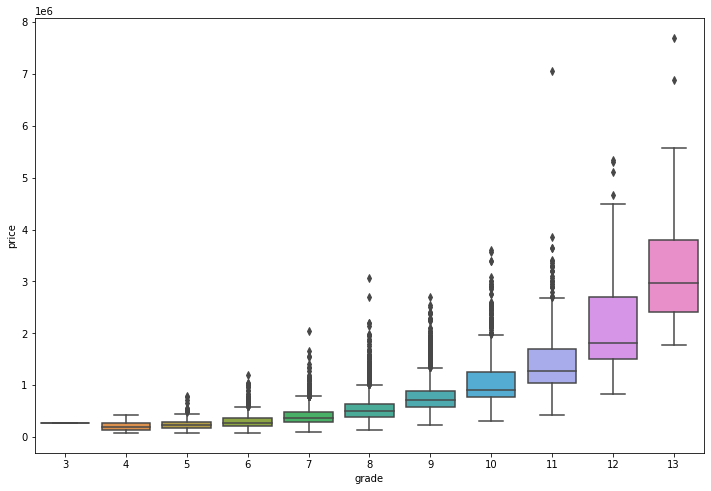

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(x='grade',y='price',data=df)

### 3. Graph Grade vs Price

ini adalah grade vs price
meunjukkan semakin tinggi grade nya, rentang hargannya juga semakin lebar, namun tidak mencapai setengah dari harga rata-rata 

menarik sekali

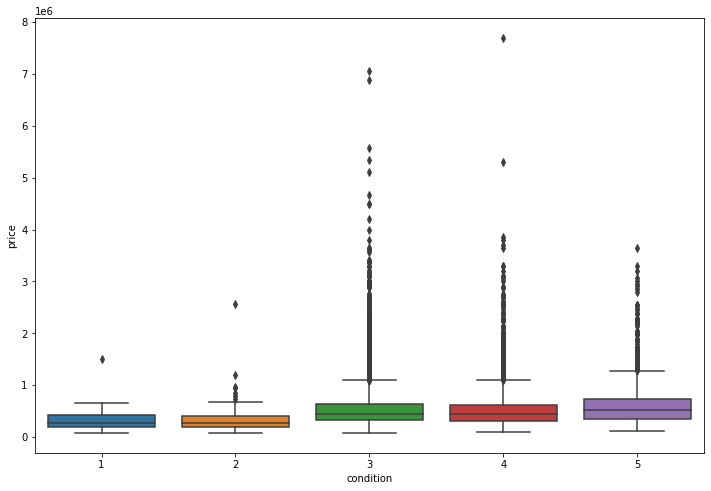

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x='condition',y='price',data=df)

### analysis
menarik sekali jika dilihat, banyak orang membeli rumah dalam kondisi sedang tidak terlalu baik dan terlalu buruk. dengan indeks nilai 3. nah bagaimana caranya mengganti condition. yang paling baik menggunakan angka karena lebih mudah untuk dianalisis secara numerik.

In [39]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

### Note:
disini lenght dari zipcode adalah 70, jadi ada 70 variasi zip code, atau ada 70 tempat yang membeli

In [40]:
# drop this zipcode
df = df.drop('zipcode',axis=1)

In [41]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [42]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,21587,21588,21589,21590,21591,21592,21593,21594,21595,21596
id,7.129301e+09,6.414100e+09,5.631500e+09,2.487201e+09,1.954401e+09,7.237550e+09,1.321400e+09,2.008000e+09,2.414600e+09,3.793500e+09,...,7.852140e+09,9.834201e+09,3.448900e+09,7.936000e+09,2.997800e+09,2.630000e+08,6.600060e+09,1.523300e+09,2.913101e+08,1.523300e+09
price,2.219000e+05,5.380000e+05,1.800000e+05,6.040000e+05,5.100000e+05,1.230000e+06,2.575000e+05,2.918500e+05,2.295000e+05,3.230000e+05,...,5.072500e+05,4.290000e+05,6.106850e+05,1.010000e+06,4.750000e+05,3.600000e+05,4.000000e+05,4.021010e+05,4.000000e+05,3.250000e+05
bedrooms,3.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00
bathrooms,1.000000e+00,2.250000e+00,1.000000e+00,3.000000e+00,2.000000e+00,4.500000e+00,2.250000e+00,1.500000e+00,1.000000e+00,2.500000e+00,...,2.500000e+00,2.000000e+00,2.500000e+00,3.500000e+00,2.500000e+00,2.500000e+00,2.500000e+00,7.500000e-01,2.500000e+00,7.500000e-01
sqft_living,1.180000e+03,2.570000e+03,7.700000e+02,1.960000e+03,1.680000e+03,5.420000e+03,1.715000e+03,1.060000e+03,1.780000e+03,1.890000e+03,...,2.270000e+03,1.490000e+03,2.520000e+03,3.510000e+03,1.310000e+03,1.530000e+03,2.310000e+03,1.020000e+03,1.600000e+03,1.020000e+03
sqft_lot,5.650000e+03,7.242000e+03,1.000000e+04,5.000000e+03,8.080000e+03,1.019300e+05,6.819000e+03,9.711000e+03,7.470000e+03,6.560000e+03,...,5.536000e+03,1.126000e+03,6.023000e+03,7.200000e+03,1.294000e+03,1.131000e+03,5.813000e+03,1.350000e+03,2.388000e+03,1.076000e+03
floors,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,...,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
waterfront,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
view,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
condition,3.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


selanjutnya kita akan mengetahui setiap feature tersebut. apakah semua feature kita butuhkan? apakah harus semuannya digunakan untuk membuat model?

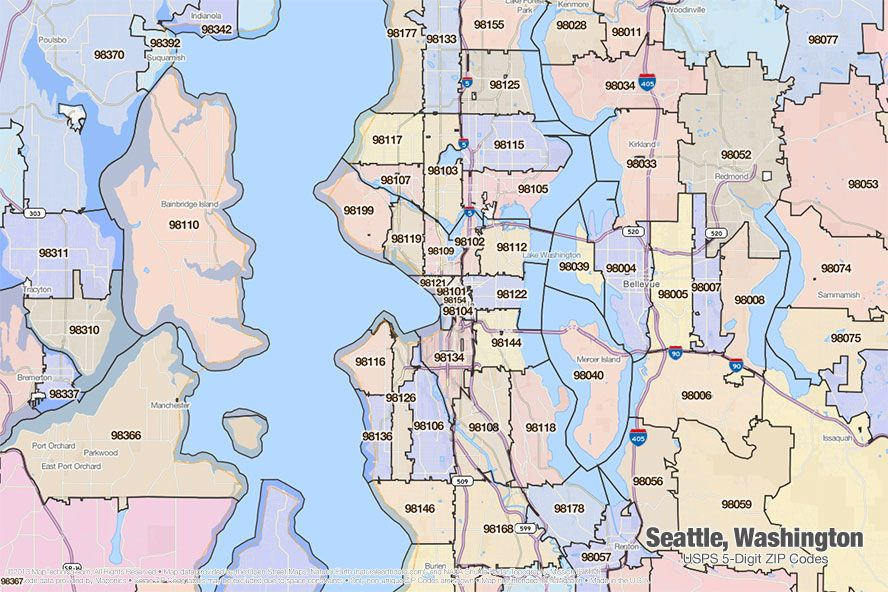

In [43]:
from IPython.display import Image
Image("https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg")

### Using Widget for better perform the Images
biasanya sudah terinstall sendiri jadi kita tidak perlu menginstallnya

In [44]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

note: tapi sampai disini dulu nanti dia menggangu yang lainnya. 

sedikit terasa lemot sekali ya, menarik sekali, memang berat jupyter notebook ini

In [45]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [46]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

seperti biasa kita harus menggunakan atau embagi data kita menjadi train set and test set

menariknya kita hanya mengeluarkan nilai Y kita dari dataset, tanpa harus choosing feature yang kita inginkan. ini yang paling mudah diguakan. 

In [47]:
X = df.drop('price',axis=1)
y = df['price']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

*JUJUR* ini gue masih bingung mengapa dia harus di scalling?


In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train = scaler.fit_transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [54]:
X_train.shape # ingat beberapa tidak mengguankan () 

(15117, 20)

### note:
ini adalah bentuk dari data kita, berjumlah row nya segitu dan ada 20 columns 

coba kita lihat shape yang lain

In [55]:
X_train.shape

(15117, 20)

In [56]:
X_test.shape

(6480, 20)

lah disini berbeda, coba kita buktika berapa persent datanya 15117/6480

ternyata benar sekali, bahwa yang berada dia nilaiya sekitar 0.3 

## 5. Creatin' this fucking model using KERAS and Tensorflow

In [57]:
# import the library to this notebook
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

##### HOray!!! 
ternyata bisa, kemarin apa ya yang tidak bisa? 

Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

adams adalah sebuah optimizer algorithm unutk stochastic gradient descent for training deep learning mmodels. ada menggabungkan dari AdaGrad dan RMSProp algorithm untuk membuat sebuah algorithm yang dapat menghandle sparse gradients pada noisy problems.

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.



In [58]:
# creating the model
model = Sequential() # this is the function 

# create layers of NN
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

# create compile function
model.compile(optimizer='adam',loss='mse')

## Training the model

waktunya ktia mentraingin data kita. menarik bukan?

In [59]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 5ms/step - loss: 430228602880.0000 - val_loss: 418865905664.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 428869648384.0000 - val_loss: 414385209344.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 411401748480.0000 - val_loss: 374652993536.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 327080116224.0000 - val_loss: 240237608960.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 170241851392.0000 - val_loss: 108675284992.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 104162590720.0000 - val_loss: 97338630144.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 99957776384.0000 - val_loss: 95704948736.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 98174926848.0000 - val_loss: 94032756736.0000
Epoch 9/400
119/119 [

apa itu epochs? 
disini ada epochs? menarik sekali, itu apa ya? 

In [60]:
# sekarang kita menghitung losses nya
losses = pd.DataFrame(model.history.history)

kita merekam model history. mengguakan history dan kita mengguakan function history

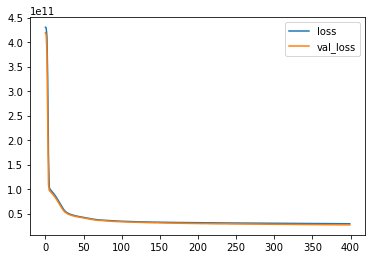

In [61]:
losses.plot()

ploting di tensorflow sedikit perbeda, langsung saja, bsa membuat losses data menjadi graphic seperti diatas

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

sekarang kita melakukan evaluasi dari data kita, mari apa saja yang dilakukan?

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

pasti salah nulis, 
okay kita menggunaan kemabali skelarn. nah disini digunakan untuk mengevaluasi data tersebut

## Predicting the Brand New Data



In [63]:
X_test # print the X_test

array([[0.15903386, 0.1       , 0.08      , ..., 0.00887725, 0.63636364,
        0.        ],
       [0.11045592, 0.3       , 0.36      , ..., 0.00993734, 0.81818182,
        0.        ],
       [0.53936987, 0.2       , 0.24      , ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.74293027, 0.1       , 0.08      , ..., 0.00506255, 1.        ,
        0.        ],
       [0.56820743, 0.3       , 0.2       , ..., 0.00774485, 0.09090909,
        1.        ],
       [0.7473301 , 0.3       , 0.32      , ..., 0.0196531 , 0.45454545,
        0.        ]])

In [64]:
print(X_test)

[[0.15903386 0.1        0.08       ... 0.00887725 0.63636364 0.        ]
 [0.11045592 0.3        0.36       ... 0.00993734 0.81818182 0.        ]
 [0.53936987 0.2        0.24       ... 0.00547073 0.90909091 0.        ]
 ...
 [0.74293027 0.1        0.08       ... 0.00506255 1.         0.        ]
 [0.56820743 0.3        0.2        ... 0.00774485 0.09090909 1.        ]
 [0.7473301  0.3        0.32       ... 0.0196531  0.45454545 0.        ]]


ternyata bentuknya seperti ini, matrices

In [65]:
# make precictions 
predictions = model.predict(X_test)

In [66]:
# show the mean_absolute_error
mean_absolute_error(y_test,predictions)

101391.09033082562

gampang sekali untuk memunculkan wkwkwk

#### remember: 
ingat perbedaan antara MSE MAE? 

In [67]:
# show the MSE? harus di numpy? karena pakai sqrt function dong
np.sqrt(mean_squared_error(y_test,predictions))

164229.74186711173

lihat angka berikut, apakah ada yang berbeda?
tentu pasti berbeda

In [68]:
# explained the variance score
explained_variance_score(y_test,predictions)

0.7966242072827426

lumayan gede juga ya,

In [69]:
df['price'].mean()

540296.5735055795

ingat dalam dolar itu $

In [70]:
df['price'].median()

450000.0

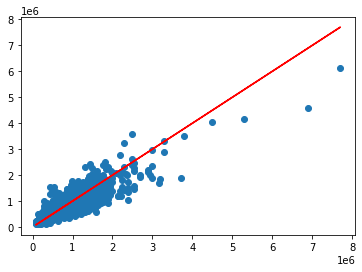

In [71]:
# Predictions kita adalah 
plt.scatter(y_test,predictions)

# Perfect predictions 
plt.plot(y_test,y_test,'r')

kalo dari gambar ini tidak terlalu

apakah laptop gue rendering terus? wkwkwk ketika menggunakan html? tentunya iya sobat

In [72]:
errors = y_test.values.reshape(6480, 1) - predictions

In [73]:
errors

array([[ -80255.40625],
       [-127173.0625 ],
       [ -88865.0625 ],
       ...,
       [  34615.40625],
       [-109410.4375 ],
       [ 564383.9375 ]])

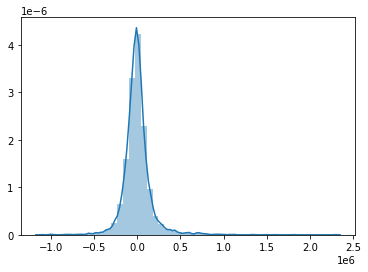

In [74]:
sns.distplot(errors)

gambarnya seperti diatas. menarik sekali. ini laptop gue tambah lemot kalo pake mojave! sial

-------------
### Predicting on a brand new house

anggaplah kita akan membeli rumah dengan kriteria tertentu. apa yang ktia lakukan?

In [75]:
single_house = df.drop('price',axis=1).iloc[0]

In [80]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

ValueError: cannot reshape array of size 20 into shape (19)

In [78]:
single_house

id               7.129301e+09
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
yr_built         1.955000e+03
yr_renovated     0.000000e+00
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
month            1.000000e+01
year             2.014000e+03
Name: 0, dtype: float64

In [81]:
model.predict(single_house)

ValueError: in user code:

    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 20 but received input with shape [None, 1]


In [82]:
df.iloc[0]

id               7.129301e+09
price            2.219000e+05
bedrooms         3.000000e+00
bathrooms        1.000000e+00
sqft_living      1.180000e+03
sqft_lot         5.650000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.180000e+03
sqft_basement    0.000000e+00
yr_built         1.955000e+03
yr_renovated     0.000000e+00
lat              4.751120e+01
long            -1.222570e+02
sqft_living15    1.340000e+03
sqft_lot15       5.650000e+03
month            1.000000e+01
year             2.014000e+03
Name: 0, dtype: float64

In [83]:
df = df.drop('id',axis=1)

In [84]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,5,2014
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2,2015
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,6,2014
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,1,2015


In [85]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

In [88]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
